In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import networkx as nx
import os

In [38]:
import pickle
import pickle
data_dir = 'simulation_results/pop_size/'

file_path = data_dir + 'sim_data_pop_size_100_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_100 = pickle.load(file)

file_path = data_dir + 'sim_data_pop_size_1000_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_1000 = pickle.load(file)

file_path = data_dir + 'sim_data_pop_size_10000_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_10000 = pickle.load(file)

In [39]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

V = data_100['freq_timeseries'].shape[0]
Q = data_100['freq_timeseries'].shape[1]

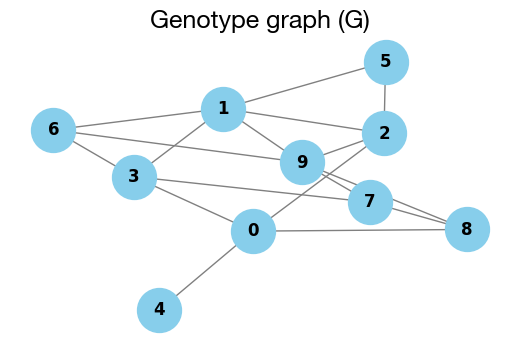

In [40]:
# show the genotype graph 

G = nx.from_numpy_array(data_100['A'])
node_labels = {i: f'{i}' for i in range(len(data_100['A']))}

plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Genotype graph (G)')
plt.show()

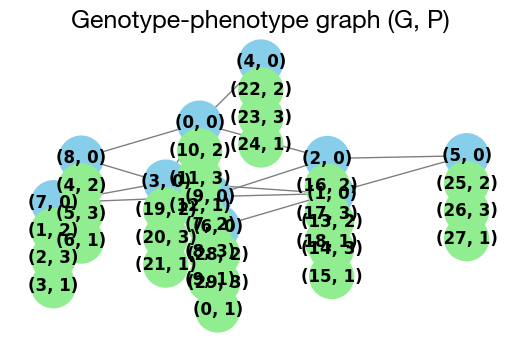

In [41]:
# show the genotype-phenotype graph 

G = nx.from_numpy_array(data_100['A'])
node_labels = {i: f'({i}, 0)' for i in range(len(data_100['A']))}

new_nodes = []
new_edges = []

# add phenotype nodes dynamically to each genotype node in the graph
new_node_start_index = len(G.nodes)

for node in G.nodes:
    for i in range(Q-1):  
        new_node = new_node_start_index + node * (Q-1) + i
        new_nodes.append(new_node)  # collect new node
        new_edges.append((node, new_node))  # collect edge between parent and child

G.add_nodes_from(new_nodes)  
G.add_edges_from(new_edges)  

# labels for phenotype nodes
for child_node in new_nodes:
    genotype_parent = child_node % len(new_nodes)
    child_number = child_node % (Q-1) + 1
    node_labels[child_node] = '(' + str(genotype_parent) + ', ' + str(child_number) + ')'

# colors 
node_colors = []
for node in G.nodes:
    if node < len(data_100['A']):  
        node_colors.append('skyblue')
    else:  
        node_colors.append('lightgreen')

# positioning the nodes
pos = nx.spring_layout(G, seed=42)

# offset the children below their parent nodes
child_pos_offset = 0.20 
for node in range(len(data_100['A'])):
    children = [n for n in G.neighbors(node)]  
    child_count = 0
    for child in children:
        if child >= len(data_100['A']): 
            pos[child] = (pos[node][0], pos[node][1] - child_pos_offset * (child_count + 1))
            child_count += 1

plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')

plt.title("Genotype-phenotype graph (G, P)")
plt.show()

In [42]:
# plt.figure(figsize=(8, 4))

# # loop through each (genotype, phenotype) pair
# for i in range(V):  # genotypes 
#     for j in range(Q):  # phenotypes 
#         plt.plot(data_100['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.ylim(-0.01,1.01)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

In [43]:
# np.mean(data_100['freq_timeseries'][:,:,20:], axis=2)

In [44]:
# np.mean(data_100['freq_timeseries'][:,:,99:], axis=2)

Population size test

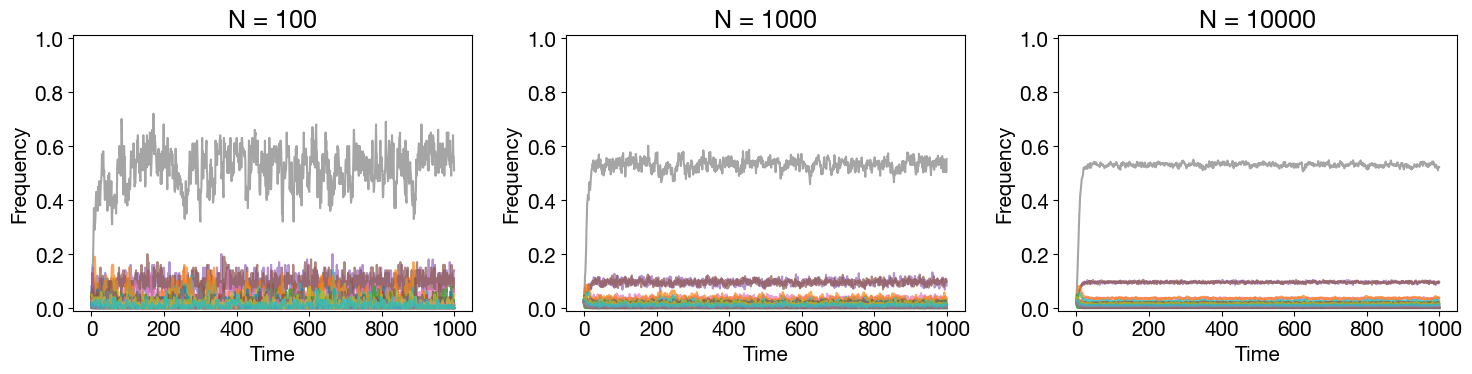

In [45]:
datasets = [data_100, data_1000, data_10000]

dataset_names = ['N = 100', 'N = 1000', 'N = 10000'] # Names for the titles of each subplot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # 1 row, 3 columns of subplots

for index, data in enumerate(datasets):
    ax = axes[index] # Select the current subplot
    for i in range(V):  # genotypes
        for j in range(Q):  # phenotypes
            ax.plot(data['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-0.01, 1.01)
    ax.set_title(dataset_names[index]) # set title for each subplot

    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

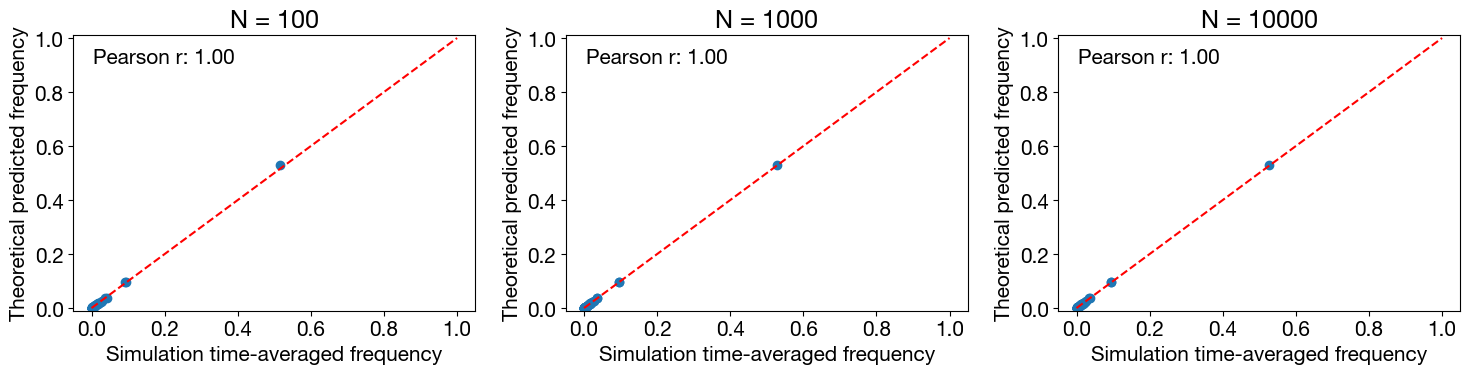

In [87]:
import scipy.stats

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # 1 row, 3 columns of subplots

for index, data in enumerate(datasets):
    ax = axes[index]
    time_average = np.mean(data['freq_timeseries'], axis=2).flatten()
    theory = data['f_eq']

    ax.plot(time_average, theory, 'o')

    # compute Pearson correlation
    correlation, _ = scipy.stats.pearsonr(time_average, theory)

    # plot the line
    x = np.linspace(0, 1, 100)
    y = x
    ax.plot(x, y, color='red', linestyle='--')

    ax.set_xlabel('Simulation time-averaged frequency')
    ax.set_ylabel('Theoretical predicted frequency')
    ax.set_ylim(-0.01, 1.01)
    ax.set_title(dataset_names[index]) # set title for each subplot
    ax.text(0.05, 0.9, f'Pearson r: {correlation:.2f}', transform=ax.transAxes)

plt.tight_layout()
plt.show()





In [81]:
np.mean(data_100['freq_timeseries'], axis=2)

array([[8.0000e-04, 1.7900e-03, 1.8200e-03, 1.3700e-03],
       [9.4160e-02, 9.1260e-02, 3.5580e-02, 5.1538e-01],
       [2.4610e-02, 2.8900e-02, 1.0600e-03, 4.1260e-02],
       [1.7240e-02, 4.5700e-03, 3.6500e-03, 3.9300e-03],
       [1.3000e-04, 2.4000e-04, 9.0000e-05, 1.3000e-04],
       [1.5660e-02, 3.6600e-03, 7.9100e-03, 1.0470e-02],
       [1.2070e-02, 2.1610e-02, 6.1000e-03, 1.4670e-02],
       [7.2000e-04, 9.0000e-05, 6.7000e-04, 2.6000e-04],
       [1.7000e-04, 1.0100e-03, 8.3000e-04, 7.3000e-04],
       [7.2100e-03, 2.4000e-03, 1.6280e-02, 9.5100e-03]])

In [82]:
np.mean(data_1000['freq_timeseries'], axis=2)

array([[8.43000e-04, 2.49300e-03, 1.94700e-03, 1.57500e-03],
       [9.45930e-02, 9.49420e-02, 3.54970e-02, 5.26855e-01],
       [2.23950e-02, 2.68270e-02, 8.30000e-04, 3.61280e-02],
       [1.69040e-02, 4.40200e-03, 3.63900e-03, 3.54600e-03],
       [1.66000e-04, 3.84000e-04, 2.57000e-04, 1.86000e-04],
       [1.53250e-02, 3.48200e-03, 7.43600e-03, 8.95700e-03],
       [1.15220e-02, 2.00710e-02, 5.17500e-03, 1.28850e-02],
       [5.65000e-04, 7.30000e-05, 5.07000e-04, 1.75000e-04],
       [8.50000e-05, 8.04000e-04, 8.46000e-04, 7.22000e-04],
       [7.23300e-03, 2.28400e-03, 1.66640e-02, 1.07800e-02]])

In [83]:
np.mean(data_10000['freq_timeseries'], axis=2)

array([[8.644000e-04, 2.129400e-03, 1.631500e-03, 1.355100e-03],
       [9.468430e-02, 9.482620e-02, 3.540600e-02, 5.264067e-01],
       [2.263360e-02, 2.670570e-02, 8.145000e-04, 3.664610e-02],
       [1.689890e-02, 4.322100e-03, 3.748300e-03, 3.709700e-03],
       [1.587000e-04, 2.342000e-04, 1.912000e-04, 1.420000e-04],
       [1.544230e-02, 3.579200e-03, 7.484300e-03, 9.270400e-03],
       [1.166400e-02, 1.997250e-02, 5.135900e-03, 1.314950e-02],
       [5.505000e-04, 7.560000e-05, 5.551000e-04, 1.921000e-04],
       [8.200000e-05, 7.160000e-04, 7.257000e-04, 6.177000e-04],
       [7.442600e-03, 2.422500e-03, 1.666300e-02, 1.075050e-02]])

In [86]:
data_100['f_eq']

array([7.18121209e-04, 1.82284373e-03, 1.40348216e-03, 1.14783259e-03,
       9.54151324e-02, 9.54003814e-02, 3.55217526e-02, 5.29720752e-01,
       2.23181719e-02, 2.62892877e-02, 7.64260205e-04, 3.60107706e-02,
       1.69541355e-02, 4.32465358e-03, 3.70318022e-03, 3.73535034e-03,
       3.24326208e-05, 5.59397215e-05, 4.60459036e-05, 3.10454070e-05,
       1.54640097e-02, 3.52557688e-03, 7.38368279e-03, 9.25945299e-03,
       1.16391393e-02, 2.00380922e-02, 5.09577706e-03, 1.31235259e-02,
       4.01429440e-04, 3.14755311e-05, 4.11681958e-04, 1.15549831e-04,
       2.87638118e-05, 4.19567972e-04, 4.26972757e-04, 3.57448420e-04,
       7.35505914e-03, 2.35834440e-03, 1.65211651e-02, 1.06277127e-02])